Genre prediction
Outline
1. Load the dataset
2. Correct existing error (duplicated genre, missing values)
3. Feature Calibration and Normalization
4. Feature Selection
5. Oversampling

In [1]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('C:/Users/hanson/Desktop/SpotifyFeatures.csv')
df.tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


Check the number of songs in each genre

In [2]:
print(df['genre'].value_counts())

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64


Correct duplicated Children's Music genre

In [3]:
df['genre'] =df['genre'].replace({'Children’s Music': 'Children\'s Music'})

There's no missing value

Data is not balanced, and we want to balance the data by oversampling.
However, before that we need to normalize the numerical features and calibrate the categorical features.
Normalization: popularity, duration_ms, loudness, tempo
Calibration: genre, key, mode, time_signature
Ignore: Artist name, songtrack name, track_id

Let's see the quantifiable original data features.
Note that key, mode and time_significant are not shown.

In [4]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


Feature Transformation

0          99373
1         137373
2         170267
3         152427
4          82625
           ...  
232720    326240
232721    282447
232722    166960
232723    222442
232724    323027
Name: duration_ms, Length: 232725, dtype: int64


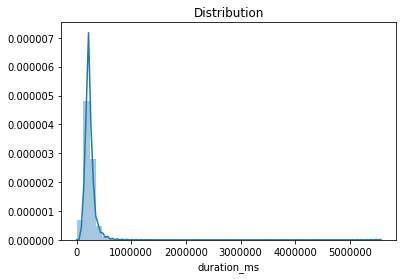

In [5]:
sb.distplot(df['duration_ms']).set_title('Distribution')
print(df['duration_ms'])

Text(0.5, 1.0, 'Distribution')

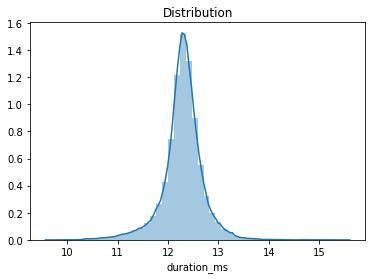

In [6]:
from scipy.stats import boxcox
import numpy as np
#data['duration_ms']
#data['duration_ms'] = np.exp(data['duration_ms'])
# power transform
df['duration_ms'] = boxcox(df['duration_ms'], 0)

#duration[~duration.isnull()]duration.astype(int)
sb.distplot(df['duration_ms']).set_title('Distribution')


0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.123000
            ...   
232720    0.544000
232721    0.000880
232722    0.000000
232723    0.000000
232724    0.000049
Name: instrumentalness, Length: 232725, dtype: float64


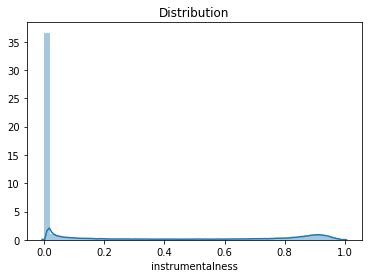

In [7]:
sb.distplot(df['instrumentalness']).set_title('Distribution')
print(df['instrumentalness'])

-8.109867469357138


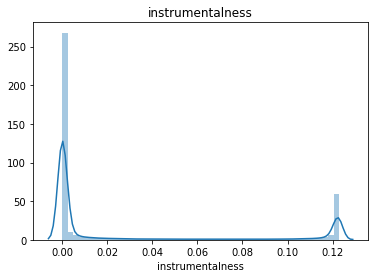

In [8]:
from scipy.stats import yeojohnson
import numpy as np
#data['duration_ms']
#data['duration_ms'] = np.exp(data['duration_ms'])
# power transform
#df['instrumentalness'] = boxcox(df['instrumentalness'], 0)
#df['instrumentalness']=np.log(df['instrumentalness'])
df['instrumentalness'], lmbda = yeojohnson(df['instrumentalness'])
#duration[~duration.isnull()]duration.astype(int)
sb.distplot(df['instrumentalness']).set_title('instrumentalness')
print(lmbda)

0         0.3460
1         0.1510
2         0.1030
3         0.0985
4         0.2020
           ...  
232720    0.0845
232721    0.2370
232722    0.0945
232723    0.3330
232724    0.0836
Name: liveness, Length: 232725, dtype: float64


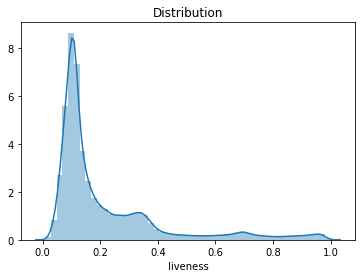

In [9]:
sb.distplot(df['liveness']).set_title('Distribution')
print(df['liveness'])

Text(0.5, 1.0, 'liveness')

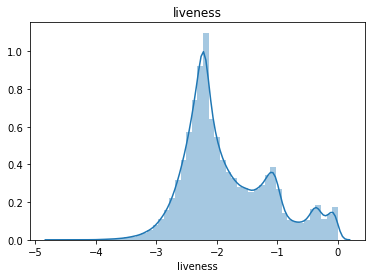

In [10]:
from scipy.stats import boxcox
import numpy as np
#data['duration_ms']
#data['duration_ms'] = np.exp(data['duration_ms'])
# power transform
df['liveness'] = boxcox(df['liveness'], 0)

#duration[~duration.isnull()]duration.astype(int)
sb.distplot(df['liveness']).set_title('liveness')

0         0.0525
1         0.0868
2         0.0362
3         0.0395
4         0.0456
           ...  
232720    0.0316
232721    0.0337
232722    0.1480
232723    0.1460
232724    0.0287
Name: speechiness, Length: 232725, dtype: float64


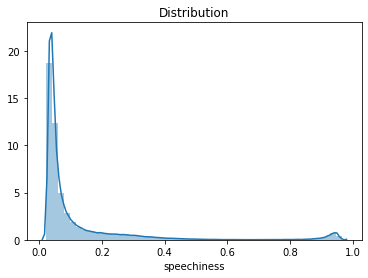

In [11]:
sb.distplot(df['speechiness']).set_title('Distribution')
print(df['speechiness'])

Text(0.5, 1.0, 'speechiness')

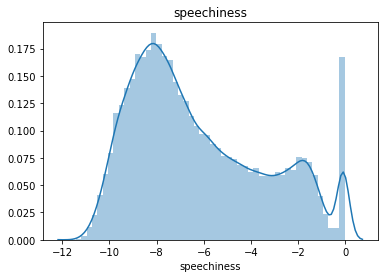

In [12]:
from scipy.stats import boxcox
import numpy as np
#data['duration_ms']
#data['duration_ms'] = np.exp(data['duration_ms'])
# power transform
df['speechiness'] = boxcox(df['speechiness'], -0.5)

#duration[~duration.isnull()]duration.astype(int)
sb.distplot(df['speechiness']).set_title('speechiness')

In [13]:
df['speechiness'].skew(axis=0)

0.5900331721194244

0         -1.828
1         -5.559
2        -13.879
3        -12.178
4        -21.150
           ...  
232720   -10.626
232721    -6.944
232722    -8.282
232723    -7.137
232724    -6.708
Name: loudness, Length: 232725, dtype: float64


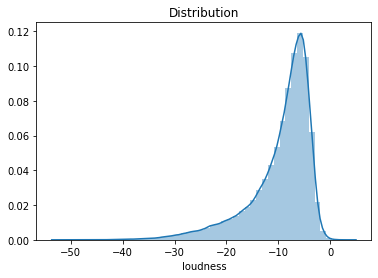

In [14]:
sb.distplot(df['loudness']).set_title('Distribution')
print(df['loudness'])

In [15]:
'''
from scipy.stats import yeojohnson
import numpy as np
df['loudness'], lmbda = yeojohnson(df['loudness'])
sb.distplot(df['loudness']).set_title('loudness')
print(lmbda)
'''

"\nfrom scipy.stats import yeojohnson\nimport numpy as np\ndf['loudness'], lmbda = yeojohnson(df['loudness'])\nsb.distplot(df['loudness']).set_title('loudness')\nprint(lmbda)\n"

Calibrate Genre, key, mode, time_signature with label encoding ( one-hot encoding is not practical for now)

'\n# importing one hot encoder from sklearn \nfrom sklearn.preprocessing import OneHotEncoder \n# creating one hot encoder object by default \n# entire data passed is one hot encoded \nonehotencoder = OneHotEncoder() \ndata = onehotencoder.fit_transform(data).toarray() \nprint(data)\n'

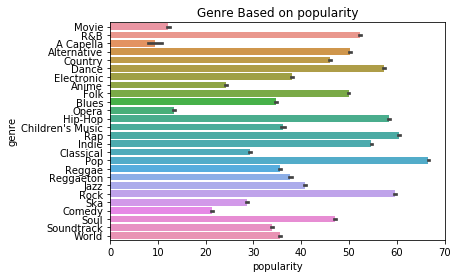

In [16]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
le = LabelEncoder()

data=df
#print(data)
#data['genre']= le.fit_transform(data['genre']) 
data['key']= le.fit_transform(data['key']) 
data['mode']= le.fit_transform(data['mode']) 
data['time_signature']= le.fit_transform(data['time_signature'])
#print(data)
#print(data['genre'].value_counts())
#print(data['energy'].value_counts())
#sns.distplot(dataframe['energy']).set_title(' Distribution')

sb.barplot(x = 'popularity', y = 'genre', data = data)
plt.title('Genre Based on popularity')

df = data

#One_hot encoding is ignored because there're too many data
'''
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
data = onehotencoder.fit_transform(data).toarray() 
print(data)
'''

In [17]:
'''
genre_list=['Movie','R&B','Alternative','Country','Dance','Electronic','Anime','Folk','Blues','Opera','Hip-Hop','Children\'s music','Rap','Indie', 'Classical','Pop','Reggae','Reggaeton','Jazz','Rock','Ska','Comedy','Soul','Soundtrack','World']
genre_value = {
     'Movie' : '',
     'R&B'   : '',
     'Alternative': '',
     'Country': '',
     'Dance'  : '',
     'Electronic'  : '',
     'Anime' : '',
     'Folk': '',
     'Blues':'',
    'Opera':'',
    'Hip-Hop':'',
    'Children\'s music':'',
    'Rap':'',
    'Indie':'', 'Classical':'','Pop':'','Reggae':'','Reggaeton':'','Jazz':'','Rock':'','Ska':'',
    'Comedy':'',
    'Soul':'',
    'Soundtrack':''
    ,'World':''
}


datanew = data
print(len(datanew))
count = 0
count2 = 0
data_genre=data['genre']
print(len(data_genre))
for element in data['genre']:
    for genr in genre_list:
        if element == genr:
            genre_value.update({genr:})
    count=count+1
print(count)
print(count2)
print(len(datanew))

'''

"\ngenre_list=['Movie','R&B','Alternative','Country','Dance','Electronic','Anime','Folk','Blues','Opera','Hip-Hop','Children's music','Rap','Indie', 'Classical','Pop','Reggae','Reggaeton','Jazz','Rock','Ska','Comedy','Soul','Soundtrack','World']\ngenre_value = {\n     'Movie' : '',\n     'R&B'   : '',\n     'Alternative': '',\n     'Country': '',\n     'Dance'  : '',\n     'Electronic'  : '',\n     'Anime' : '',\n     'Folk': '',\n     'Blues':'',\n    'Opera':'',\n    'Hip-Hop':'',\n    'Children's music':'',\n    'Rap':'',\n    'Indie':'', 'Classical':'','Pop':'','Reggae':'','Reggaeton':'','Jazz':'','Rock':'','Ska':'',\n    'Comedy':'',\n    'Soul':'',\n    'Soundtrack':''\n    ,'World':''\n}\n\n\ndatanew = data\nprint(len(datanew))\ncount = 0\ncount2 = 0\ndata_genre=data['genre']\nprint(len(data_genre))\nfor element in data['genre']:\n    for genr in genre_list:\n        if element == genr:\n            genre_value.update({genr:})\n    count=count+1\nprint(count)\nprint(count2)\npri

In [18]:
'''
#Remove outliers
datanew = df
datanew = datanew[datanew.acousticness >= 0.02]
datanew = datanew[datanew.popularity >= 3]
datanew = datanew[datanew.instrumentalness >0.05]
datanew = datanew[datanew.valence >0.05]
df=datanew
'''

'\n#Remove outliers\ndatanew = df\ndatanew = datanew[datanew.acousticness >= 0.02]\ndatanew = datanew[datanew.popularity >= 3]\ndatanew = datanew[datanew.instrumentalness >0.05]\ndatanew = datanew[datanew.valence >0.05]\ndf=datanew\n'

In [19]:
'''
count = df['track_name'].str.split().apply(len)
print(count)
'''

"\ncount = df['track_name'].str.split().apply(len)\nprint(count)\n"

Now all the features are having numerical data
Normalize all the features that are not in the range of (0, 1):
-popularity, duration_ms, loudness, tempo
-genre, key, mode, time_signature

In [20]:
from sklearn import preprocessing
import numpy as np
# Normalize total_bedrooms column


#x_array = np.array(data['popularity'])
#normalized_X = preprocessing.normalize([x_array],norm='max')
#print((normalized_X[0]))
#print(normalized_X.shape)
#print(data['popularity'])

#print(data)
#data['popularity']=normalized_X[0]

data=df
def normalization(col,data):
    x_array = np.array(data[col])
    normalized_X = preprocessing.normalize([x_array],norm='max')
    data=data.drop(columns=[col])
    data[col]=normalized_X[0]
    return data

list1=['popularity','duration_ms','tempo','key','mode','time_signature',
      'instrumentalness','liveness','speechiness']
for col in list1:
    data=normalization(col,data)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.0001, 1))
output = min_max_scaler.fit_transform(np.array(data['loudness']).reshape(-1, 1))
data=data.drop(columns=['loudness'])
data['loudness']=output


'''
x_array = np.array(df['popularity'])
normalized_X = preprocessing.normalize([x_array])
np.array(df['popularity']) = x_array

x_array = np.array(df['duration_ms'])
normalized_X = preprocessing.normalize([x_array])
x_array = np.array(df['loudness'])
normalized_X = preprocessing.normalize([x_array])
x_array = np.array(df['tempo'])
normalized_X = preprocessing.normalize([x_array])
x_array = np.array(df['popularity'])
normalized_X = preprocessing.normalize([x_array])
'''
#data=data.drop(columns=['popularity', 'duration_ms','loudness', 'tempo', 'genre', 'key', 'mode', 'time_signature'])
#print(data)



"\nx_array = np.array(df['popularity'])\nnormalized_X = preprocessing.normalize([x_array])\nnp.array(df['popularity']) = x_array\n\nx_array = np.array(df['duration_ms'])\nnormalized_X = preprocessing.normalize([x_array])\nx_array = np.array(df['loudness'])\nnormalized_X = preprocessing.normalize([x_array])\nx_array = np.array(df['tempo'])\nnormalized_X = preprocessing.normalize([x_array])\nx_array = np.array(df['popularity'])\nnormalized_X = preprocessing.normalize([x_array])\n"

0         0.900866
1         0.834486
2         0.686460
3         0.716724
4         0.557098
            ...   
232720    0.744336
232721    0.809844
232722    0.786039
232723    0.806411
232724    0.814043
Name: loudness, Length: 232725, dtype: float64


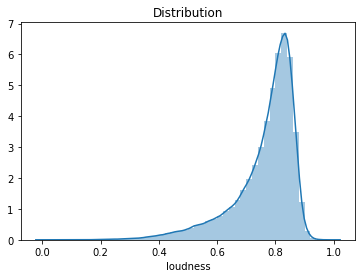

In [21]:
sb.distplot(data['loudness']).set_title('Distribution')
print(data['loudness'])

Text(0.5, 1.0, 'Distribution')

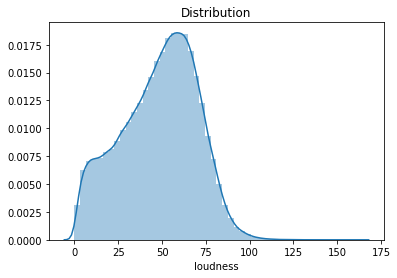

In [22]:
from scipy.stats import yeojohnson
import numpy as np
#data['duration_ms']
#data['duration_ms'] = np.exp(data['duration_ms'])
# power transform
data['loudness'], lamba = yeojohnson(data['loudness'])

#duration[~duration.isnull()]duration.astype(int)
sb.distplot(data['loudness']).set_title('Distribution')


In [23]:
#Normalize loudness again
min_max_scaler = preprocessing.MinMaxScaler()
output = min_max_scaler.fit_transform(np.array(data['loudness']).reshape(-1, 1))
data=data.drop(columns=['loudness'])
data['loudness']=output

In [24]:
data['loudness'].skew(axis=0, skipna=True)

-0.23013499074520505

In [25]:
'''
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
#Correlation between genre and other features
#data[data.columns[:]].corr()['genre'][:]
#Find correlation between differnt genres
aggregation_functions = { 'mean'} #'amount': 'sum', 'name': 'first'}
data_new = data.groupby(data['genre']).aggregate(aggregation_functions)
data_new_T=data_new.T
correlation=data_new_T.corr()
#print(correlation)
print(correlation.to_string())
#print_full(correlation)
'''

"\ndef print_full(x):\n    pd.set_option('display.max_rows', len(x))\n    print(x)\n    pd.reset_option('display.max_rows')\n#Correlation between genre and other features\n#data[data.columns[:]].corr()['genre'][:]\n#Find correlation between differnt genres\naggregation_functions = { 'mean'} #'amount': 'sum', 'name': 'first'}\ndata_new = data.groupby(data['genre']).aggregate(aggregation_functions)\ndata_new_T=data_new.T\ncorrelation=data_new_T.corr()\n#print(correlation)\nprint(correlation.to_string())\n#print_full(correlation)\n"

Remove some genres

In [26]:
#Not a properly defined genre
data=data[data.genre !='Movie']
data=data[data.genre !='Soundtrack']
data=data[data.genre !='Anime']
data=data[data.genre !='World']
data=data[data.genre !='Jazz']

data=data[data.genre !='Children\'s Music']
data=data[data.genre !='Pop'] #High Correlation w/ other genres
data=data[data.genre !='Alternative'] #High Correlation w/ other genres

data=data[data.genre !='Folk']
data=data[data.genre !='Soul']
data=data[data.genre !='Reggae']
data=data[data.genre !='R&B']
data=data[data.genre !='Indie']
data=data[data.genre !='Dance']
data=data[data.genre !='Blues']
data=data[data.genre !='Country']
data=data[data.genre !='Rap']
#0.84 overall

#Combine hip-hop and rap
#data['genre'] =data['genre'].replace({'Rap': 'Hip-Hop'})
#Dance, Hip-Hop, Jazz, Rap, World
#data['genre'] =data['genre'].replace({'Reggae': 'Reggaeton'})
#data['genre'] =data['genre'].replace({'Blues': 'Instrument'})


Shuffle the data randomly  time_signature,mode,key,liveness

In [27]:
#data.head()
data=data.sample(frac=1)
data.head()
data.describe()

,acousticness,danceability,energy,valence,popularity,duration_ms,tempo,key,mode,time_signature,instrumentalness,liveness,speechiness,loudness
count,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000,73081.000000
mean,0.425102,0.538912,0.585555,0.439405,0.360245,0.791750,0.475531,0.484159,0.349475,0.716140,0.247204,-1.663836,154.823145,0.282926
std,0.393313,0.199668,0.297756,0.268046,0.185240,0.029773,0.132448,0.313438,0.476808,0.117406,0.400799,0.834845,89.826971,0.150669
min,0.000001,0.058200,0.000020,0.000000,0.000000,0.621332,0.133597,0.000000,0.000000,0.000000,-0.000000,-4.422849,1.000000,0.000827
25%,0.034700,0.397000,0.357000,0.204000,0.220000,0.778472,0.370374,0.272727,0.000000,0.750000,-0.000000,-2.302585,75.429186,0.150145
50%,0.274000,0.556000,0.660000,0.426000,0.340000,0.792305,0.458216,0.454545,0.000000,0.750000,0.000376,-1.890475,175.252277,0.306834
75%,0.864000,0.695000,0.836000,0.654000,0.520000,0.806313,0.567963,0.727273,1.000000,0.750000,0.438569,-1.055553,228.943004,0.401727
max,0.996000,0.987000,0.999000,0.992000,0.980000,1.000000,0.974607,1.000000,1.000000,1.000000,0.999925,0.000000,335.789087,0.811384


Remove duplicate labels of the same song randomly

In [28]:
data=data.drop_duplicates(['track_id'], keep='first')

In [29]:
#data=df
datanew=data.duplicated(subset=None, keep=False)
#print(datanew)
for i in datanew:
    if i==True:
        print("oh")
#data.describe()
print(data['genre'].value_counts())

Comedy        9678
Electronic    9359
Rock          9195
Hip-Hop       9084
Classical     9055
Ska           8854
Reggaeton     8783
Opera         8088
A Capella      119
Name: genre, dtype: int64


Outlier detection

In [30]:
'''
from scipy import stats

outliers=[]
def detect_outlier(data_energy):
    threshold=4
    mean_1 = np.mean(data_energy)
    std_1 =np.std(data_energy)
    for y in data_energy:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

#z=np.abs(stats.zscore(data[]))
#print(z)

outliers=detect_outlier(data['speechiness'])

print(outliers)
print(len(outliers))


#Remove those with higher liveness, 7000 -->5573 -->0
#Remove those with higher speechiness z-score ->9000 ->2189
#popularity z score, 27 ->83
#duration, 2314 ->1779 ->985
#tempo 106 ->
#time_signature 2600 2346
#loudness 4000 ->573
'''

"\nfrom scipy import stats\n\noutliers=[]\ndef detect_outlier(data_energy):\n    threshold=4\n    mean_1 = np.mean(data_energy)\n    std_1 =np.std(data_energy)\n    for y in data_energy:\n        z_score= (y - mean_1)/std_1 \n        if np.abs(z_score) > threshold:\n            outliers.append(y)\n    return outliers\n\n#z=np.abs(stats.zscore(data[]))\n#print(z)\n\noutliers=detect_outlier(data['speechiness'])\n\nprint(outliers)\nprint(len(outliers))\n\n\n#Remove those with higher liveness, 7000 -->5573 -->0\n#Remove those with higher speechiness z-score ->9000 ->2189\n#popularity z score, 27 ->83\n#duration, 2314 ->1779 ->985\n#tempo 106 ->\n#time_signature 2600 2346\n#loudness 4000 ->573\n"

In [31]:
'''
datanew=data
print(len(datanew))
count = 0
count2=0
data_speech=data['speechiness']
print(len(data_speech))
for element in data['speechiness']:
    if element in outliers:
        #get the index
        #datanew=datanew.drop(datanew.index[count])
        count2=count2+1
        datanew = datanew[datanew.speechiness != element]
    count=count+1
print(count)
print(count2)
print(len(datanew))
'''

"\ndatanew=data\nprint(len(datanew))\ncount = 0\ncount2=0\ndata_speech=data['speechiness']\nprint(len(data_speech))\nfor element in data['speechiness']:\n    if element in outliers:\n        #get the index\n        #datanew=datanew.drop(datanew.index[count])\n        count2=count2+1\n        datanew = datanew[datanew.speechiness != element]\n    count=count+1\nprint(count)\nprint(count2)\nprint(len(datanew))\n"

In [32]:
'''
data=datanew
"""
outliers=[]
def detect_outlier(data_energy):
    threshold=4
    mean_1 = np.mean(data_energy)
    std_1 =np.std(data_energy)
    print()
    for y in data_energy:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outliers=detect_outlier(datanew['speechiness'])
print(len(outliers))
"""
'''

'\ndata=datanew\n"""\noutliers=[]\ndef detect_outlier(data_energy):\n    threshold=4\n    mean_1 = np.mean(data_energy)\n    std_1 =np.std(data_energy)\n    print()\n    for y in data_energy:\n        z_score= (y - mean_1)/std_1 \n        if np.abs(z_score) > threshold:\n            outliers.append(y)\n    return outliers\noutliers=detect_outlier(datanew[\'speechiness\'])\nprint(len(outliers))\n"""\n'

Seperate the features and targets

In [33]:
#Remove some genres
#data=data[data.genre !='Comedy']
data=data[data.genre !='A Capella']
X=data.drop('genre',1)
X=X.drop('artist_name',1)
X=X.drop('track_name',1)
X=X.drop('track_id',1)
#X=X.drop('popularity',1)
#X=X.drop('duration_ms',1)

##Dropped previously
#Added these back reduce accracy from 0.78 to 0.745
X=X.drop('mode',1)
X=X.drop('liveness',1)
X=X.drop('key',1)


#X=X.drop('time_signature',1)
X.head(5)
y = data['genre']
#y.head()

Undersample to balance the data

In [34]:
'''
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler('all')
X, y = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))
'''

"\nfrom collections import Counter\nfrom imblearn.under_sampling import RandomUnderSampler\nrus = RandomUnderSampler('all')\nX, y = rus.fit_resample(X, y)\nprint('Resampled dataset shape %s' % Counter(y))\n"

Split the data into training & testing, 9:1
209452 training data, 23273 testing data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 32)
print(len(X_train))
print(len(X_test))


64886
7210


Oversampling on only the training data.
Reason: for testing, we need real data value, excluding the generated data by SMOTE

In [36]:
'''
from imblearn.over_sampling import SMOTE

sm = SMOTE('not majority')
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape)
'''
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

Using TensorFlow backend.


In [37]:
#Use cross validation
X_train_cv=X_train
y_train_cv=y_train
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train_cv, y_train_cv, cv=10)
print(scores)
print("the avearge accuracy is:"+str(sum(scores)/10))

C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

[0.84621993 0.8483677  0.84965636 0.854811   0.85194731 0.85423826
 0.85280641 0.85048739 0.85894495 0.94266055]
the avearge accuracy is:0.8610139854398519


Split the training data into training & validation, validation is 1 out of 9
186202 real training data, 23250 validation data.

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.111, random_state=32)
print(len(X_train))
print(len(X_valid))

62066
7750


Do feature selection

In [39]:
'''
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression(solver='newton-cg',multi_class='multinomial')
rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\n# feature extraction\nmodel = LogisticRegression(solver=\'newton-cg\',multi_class=\'multinomial\')\nrfe = RFE(model, 1)\nfit = rfe.fit(X_train, y_train)\nprint("Num Features: %d" % fit.n_features_)\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [40]:
'''
#print(len(x_train_res[:]))
d=pd.DataFrame(data=y_train)
#d.describe()
#da=pd.DataFrame(data=y_train_over)
#print(da[0].value_counts())

print(d[0].value_counts())
'''

'\n#print(len(x_train_res[:]))\nd=pd.DataFrame(data=y_train)\n#d.describe()\n#da=pd.DataFrame(data=y_train_over)\n#print(da[0].value_counts())\n\nprint(d[0].value_counts())\n'

Now train the oversampled data on the model RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict_rfc = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_predict_rfc)
print("Accuracy: " + str(accuracy))

C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8596129032258064


In [42]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hanson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.7641290322580645


In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.6947096774193549


In [44]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.7974193548387096


In [45]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
nb_predict=clf.predict(X_valid)
nb_accu = accuracy_score(y_valid, nb_predict)
print("Accuracy: " + str(nb_accu))

Accuracy: 0.7276129032258064


Print accuracy per each class

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_valid, y_predict_rfc))
matrix = confusion_matrix(y_valid, y_predict_rfc)
matrix.diagonal()/matrix.sum(axis=1)

              precision    recall  f1-score   support

   Classical       0.89      0.88      0.88      1002
      Comedy       0.98      0.96      0.97       931
  Electronic       0.83      0.78      0.80       953
     Hip-Hop       0.79      0.87      0.83       976
       Opera       0.92      0.93      0.92       952
   Reggaeton       0.82      0.78      0.80       990
        Rock       0.83      0.87      0.85       975
         Ska       0.83      0.81      0.82       971

    accuracy                           0.86      7750
   macro avg       0.86      0.86      0.86      7750
weighted avg       0.86      0.86      0.86      7750



array([0.87924152, 0.96025779, 0.78174187, 0.87295082, 0.92962185,
       0.77676768, 0.87384615, 0.80741504])

In [47]:
print(matrix)

[[881   1  32   0  64   0   7  17]
 [  5 894   0   1   6  11   0  14]
 [ 29   2 745  26   3  43  48  57]
 [  0   1  20 852   0  36  62   5]
 [ 64   2   0   0 885   0   0   1]
 [  2   6  38  97   0 769  19  59]
 [  6   0  18  83   0  10 852   6]
 [  7   4  49  15   5  71  36 784]]


from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train_over, y_train_over)
y_predict = clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_predict)
print("Accuracy: " + str(accuracy))

In [48]:
import tensorflow as tf
from keras import models
from keras import layers

#For the RTX 2060 GPU to work in Tensorflow-gpu 2.0, setting the memory growth.
import tensorflow.keras
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=1,
                    batch_size=28,
                    validation_data=(X_valid, y_valid))

valid_loss, valid_acc = model.evaluate(X_test,y_test)

print('valid_acc: ', valid_acc)

Train on 62066 samples, validate on 7750 samples
Epoch 1/1


ValueError: could not convert string to float: 'Opera'